# Лабораторная по большим данным

## Ссылки

- [dataset](https://www.kaggle.com/datasets/mrdaniilak/russia-real-estate-2021/data)
- [heatmap guide](https://www.youtube.com/watch?v=vSGWmZre31A&ab_channel=AndyMcDonald)

## Библиотеки

- pandas
- matplotlib
- sklearn
- folium
- plotly


## Задание

- выделить регион Санкт-Петербург
- очистить данные от выбросов
    - построить тепловую карту
    - построить гистограммы распределения и диаграммы рассеяния
    - выбросы отрезаем по стандартному отклонению (z-индекс)
    - построить корреляционную матрицу
- в отчет обязательно включить описание данных
    - использовать встроенные методы pandas
    - есть ли пропуски были ли обнаружены аномальные значения
    - как обрабатывались выбросы и как принималось решение, что это выброс
- разделить выборку на несколько в зависимости от стоимости и площади
- взять модель множественной линейной регрессии
- отобрать признаки по которым будем обучать
- применить масштабирование данных с помощью StandardScaler
- попробовать как масштабировать таргет, так и нет (если масштабируем то можно, к примеру, применить логарифмирование)
- разделяем выборку на обучающую и тестовую (метод из sklearn)
- обучить модель
- посчитать коэффициент-R^2 и среднюю абсолютную ошибку

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression

In [2]:
# df  = pd.read_csv("dataset/input_data.csv")
# df = pd.read_csv('dataset/input_data.csv', sep = ';')
df = pd.read_csv('input_data.csv', sep = ';')
df.head()

,date,price,level,levels,rooms,area,kitchen_area,geo_lat,geo_lon,building_type,object_type,postal_code,street_id,id_region,house_id
0,2021-01-01,2451300,15.0,31.0,1.0,30.3,0.0,56.780112,60.699355,0.0,2.0,620000.0,NaN,66.0,1632918.0
1,2021-01-01,1450000,5.0,5.0,1.0,33.0,6.0,44.608154,40.138381,0.0,0.0,385000.0,NaN,1.0,NaN
2,2021-01-01,10700000,4.0,13.0,3.0,85.0,12.0,55.540060,37.725112,3.0,0.0,142701.0,242543.0,50.0,681306.0
3,2021-01-01,3100000,3.0,5.0,3.0,82.0,9.0,44.608154,40.138381,0.0,0.0,385000.0,NaN,1.0,NaN
4,2021-01-01,2500000,2.0,3.0,1.0,30.0,9.0,44.738685,37.713668,3.0,2.0,353960.0,439378.0,23.0,1730985.0


# SPB

In [3]:
saint_petersburg_df = df[df.id_region == 78]
# saint_petersburg_df['price_per_metr'] = df.price/df.area
saint_petersburg_df

,date,price,level,levels,rooms,area,kitchen_area,geo_lat,geo_lon,building_type,object_type,postal_code,street_id,id_region,house_id
15,2021-01-01,8865000,10.0,13.0,2.0,66.7,14.6,59.851179,30.411657,4.0,2.0,192288.0,569976.0,78.0,1690045.0
63,2021-01-01,4200000,12.0,25.0,-1.0,25.8,-100.0,60.036889,30.226123,3.0,2.0,190000.0,291085.0,78.0,2484205.0
99,2021-01-01,6574995,10.0,11.0,-1.0,31.0,-100.0,59.936744,30.251800,3.0,0.0,199406.0,172995.0,78.0,1780424.0
108,2021-01-01,7068330,12.0,13.0,1.0,42.3,18.7,55.638429,37.652912,0.0,2.0,NaN,NaN,78.0,NaN
151,2021-01-01,8865000,11.0,13.0,2.0,66.7,14.6,59.851179,30.411657,4.0,2.0,192288.0,569976.0,78.0,1690045.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39436,2021-01-05,5450000,5.0,12.0,-1.0,25.8,-100.0,59.926208,30.295114,3.0,2.0,190000.0,403955.0,78.0,2056222.0
39475,2021-01-05,5850174,1.0,5.0,2.0,49.1,-100.0,59.798472,30.331733,4.0,2.0,196140.0,349079.0,78.0,1427199.0
39517,2021-01-05,6299000,3.0,8.0,-1.0,31.0,0.0,59.984093,30.249716,0.0,0.0,197374.0,168232.0,78.0,1628642.0
39561,2021-01-05,8500000,7.0,16.0,2.0,80.0,15.5,59.968545,30.428010,4.0,0.0,195253.0,505784.0,78.0,2456992.0


In [4]:
saint_petersburg_df['date'] = pd.to_datetime(saint_petersburg_df['date'])

saint_petersburg_df['year'] = saint_petersburg_df['date'].dt.year
saint_petersburg_df['month'] = saint_petersburg_df['date'].dt.month
saint_petersburg_df

<ipython-input-4-cd473a6473ff>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  saint_petersburg_df['date'] = pd.to_datetime(saint_petersburg_df['date'])
<ipython-input-4-cd473a6473ff>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  saint_petersburg_df['year'] = saint_petersburg_df['date'].dt.year
<ipython-input-4-cd473a6473ff>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docume

,date,price,level,levels,rooms,area,kitchen_area,geo_lat,geo_lon,building_type,object_type,postal_code,street_id,id_region,house_id,year,month
15,2021-01-01,8865000,10.0,13.0,2.0,66.7,14.6,59.851179,30.411657,4.0,2.0,192288.0,569976.0,78.0,1690045.0,2021,1
63,2021-01-01,4200000,12.0,25.0,-1.0,25.8,-100.0,60.036889,30.226123,3.0,2.0,190000.0,291085.0,78.0,2484205.0,2021,1
99,2021-01-01,6574995,10.0,11.0,-1.0,31.0,-100.0,59.936744,30.251800,3.0,0.0,199406.0,172995.0,78.0,1780424.0,2021,1
108,2021-01-01,7068330,12.0,13.0,1.0,42.3,18.7,55.638429,37.652912,0.0,2.0,NaN,NaN,78.0,NaN,2021,1
151,2021-01-01,8865000,11.0,13.0,2.0,66.7,14.6,59.851179,30.411657,4.0,2.0,192288.0,569976.0,78.0,1690045.0,2021,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39436,2021-01-05,5450000,5.0,12.0,-1.0,25.8,-100.0,59.926208,30.295114,3.0,2.0,190000.0,403955.0,78.0,2056222.0,2021,1
39475,2021-01-05,5850174,1.0,5.0,2.0,49.1,-100.0,59.798472,30.331733,4.0,2.0,196140.0,349079.0,78.0,1427199.0,2021,1
39517,2021-01-05,6299000,3.0,8.0,-1.0,31.0,0.0,59.984093,30.249716,0.0,0.0,197374.0,168232.0,78.0,1628642.0,2021,1
39561,2021-01-05,8500000,7.0,16.0,2.0,80.0,15.5,59.968545,30.428010,4.0,0.0,195253.0,505784.0,78.0,2456992.0,2021,1


In [5]:
saint_petersburg_df = saint_petersburg_df.drop(['date'], axis = 1)
saint_petersburg_df = saint_petersburg_df.drop(['id_region'], axis = 1)
saint_petersburg_df

,price,level,levels,rooms,area,kitchen_area,geo_lat,geo_lon,building_type,object_type,postal_code,street_id,house_id,year,month
15,8865000,10.0,13.0,2.0,66.7,14.6,59.851179,30.411657,4.0,2.0,192288.0,569976.0,1690045.0,2021,1
63,4200000,12.0,25.0,-1.0,25.8,-100.0,60.036889,30.226123,3.0,2.0,190000.0,291085.0,2484205.0,2021,1
99,6574995,10.0,11.0,-1.0,31.0,-100.0,59.936744,30.251800,3.0,0.0,199406.0,172995.0,1780424.0,2021,1
108,7068330,12.0,13.0,1.0,42.3,18.7,55.638429,37.652912,0.0,2.0,NaN,NaN,NaN,2021,1
151,8865000,11.0,13.0,2.0,66.7,14.6,59.851179,30.411657,4.0,2.0,192288.0,569976.0,1690045.0,2021,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39436,5450000,5.0,12.0,-1.0,25.8,-100.0,59.926208,30.295114,3.0,2.0,190000.0,403955.0,2056222.0,2021,1
39475,5850174,1.0,5.0,2.0,49.1,-100.0,59.798472,30.331733,4.0,2.0,196140.0,349079.0,1427199.0,2021,1
39517,6299000,3.0,8.0,-1.0,31.0,0.0,59.984093,30.249716,0.0,0.0,197374.0,168232.0,1628642.0,2021,1
39561,8500000,7.0,16.0,2.0,80.0,15.5,59.968545,30.428010,4.0,0.0,195253.0,505784.0,2456992.0,2021,1


In [6]:
saint_petersburg_df.describe()

,price,level,levels,rooms,area,kitchen_area,geo_lat,geo_lon,building_type,object_type,postal_code,street_id,house_id,year,month
count,2.393000e+03,2393.000000,2393.000000,2393.000000,2393.000000,2393.000000,2393.000000,2393.000000,2393.00000,2393.000000,2228.000000,2117.000000,2.328000e+03,2393.0,2393.0
mean,1.080148e+07,8.260343,15.501880,1.461763,59.945516,-11.381329,59.924259,30.313564,1.79440,1.287923,194328.543537,347642.896552,1.566854e+06,2021.0,1.0
std,1.516668e+07,6.276676,7.305168,1.505668,41.925655,49.122009,0.261046,0.447661,1.69433,0.957854,5521.028126,125488.075965,5.858062e+05,0.0,0.0
min,4.500000e+05,1.000000,2.000000,-1.000000,10.000000,-100.000000,55.638429,29.514786,0.00000,0.000000,111622.000000,116825.000000,5.893540e+05,2021.0,1.0
25%,4.745058e+06,3.000000,9.000000,1.000000,33.800000,0.000000,59.864023,30.227923,0.00000,0.000000,191119.000000,263616.000000,1.090200e+06,2021.0,1.0
50%,6.850000e+06,6.000000,15.000000,2.000000,48.390000,10.300000,59.939084,30.315879,2.00000,2.000000,195248.000000,327812.000000,1.416942e+06,2021.0,1.0
75%,1.118430e+07,12.000000,24.000000,2.000000,70.300000,15.500000,60.008591,30.370481,3.00000,2.000000,197371.000000,453557.000000,1.978015e+06,2021.0,1.0
max,3.400000e+08,29.000000,34.000000,8.000000,497.000000,160.000000,60.235755,37.850793,5.00000,2.000000,199406.000000,586439.000000,2.833148e+06,2021.0,1.0


### Очистка от выбросов

In [16]:
pip install folium

In [17]:
# тепловая карта
import folium
from folium.plugins import HeatMap

In [ ]:
mapa = folium.Map(location=[saint_petersburg_df.geo_lat.mean(), saint_petersburg_df.geo_lon.mean()], zoom_start=6)
map_values = saint_petersburg_df[['geo_lat', 'geo_lon', 'price']]
data = map_values.values.tolist()
hm = HeatMap(data, min_opacity=0.05, max_opacity=0.9, radius=25).add_to(mapa)
mapa

In [ ]:
pip install plotly_express

In [ ]:
# гистограммы распределения

Text(0.0, 1.0, 'Распределение площадей кухонь')

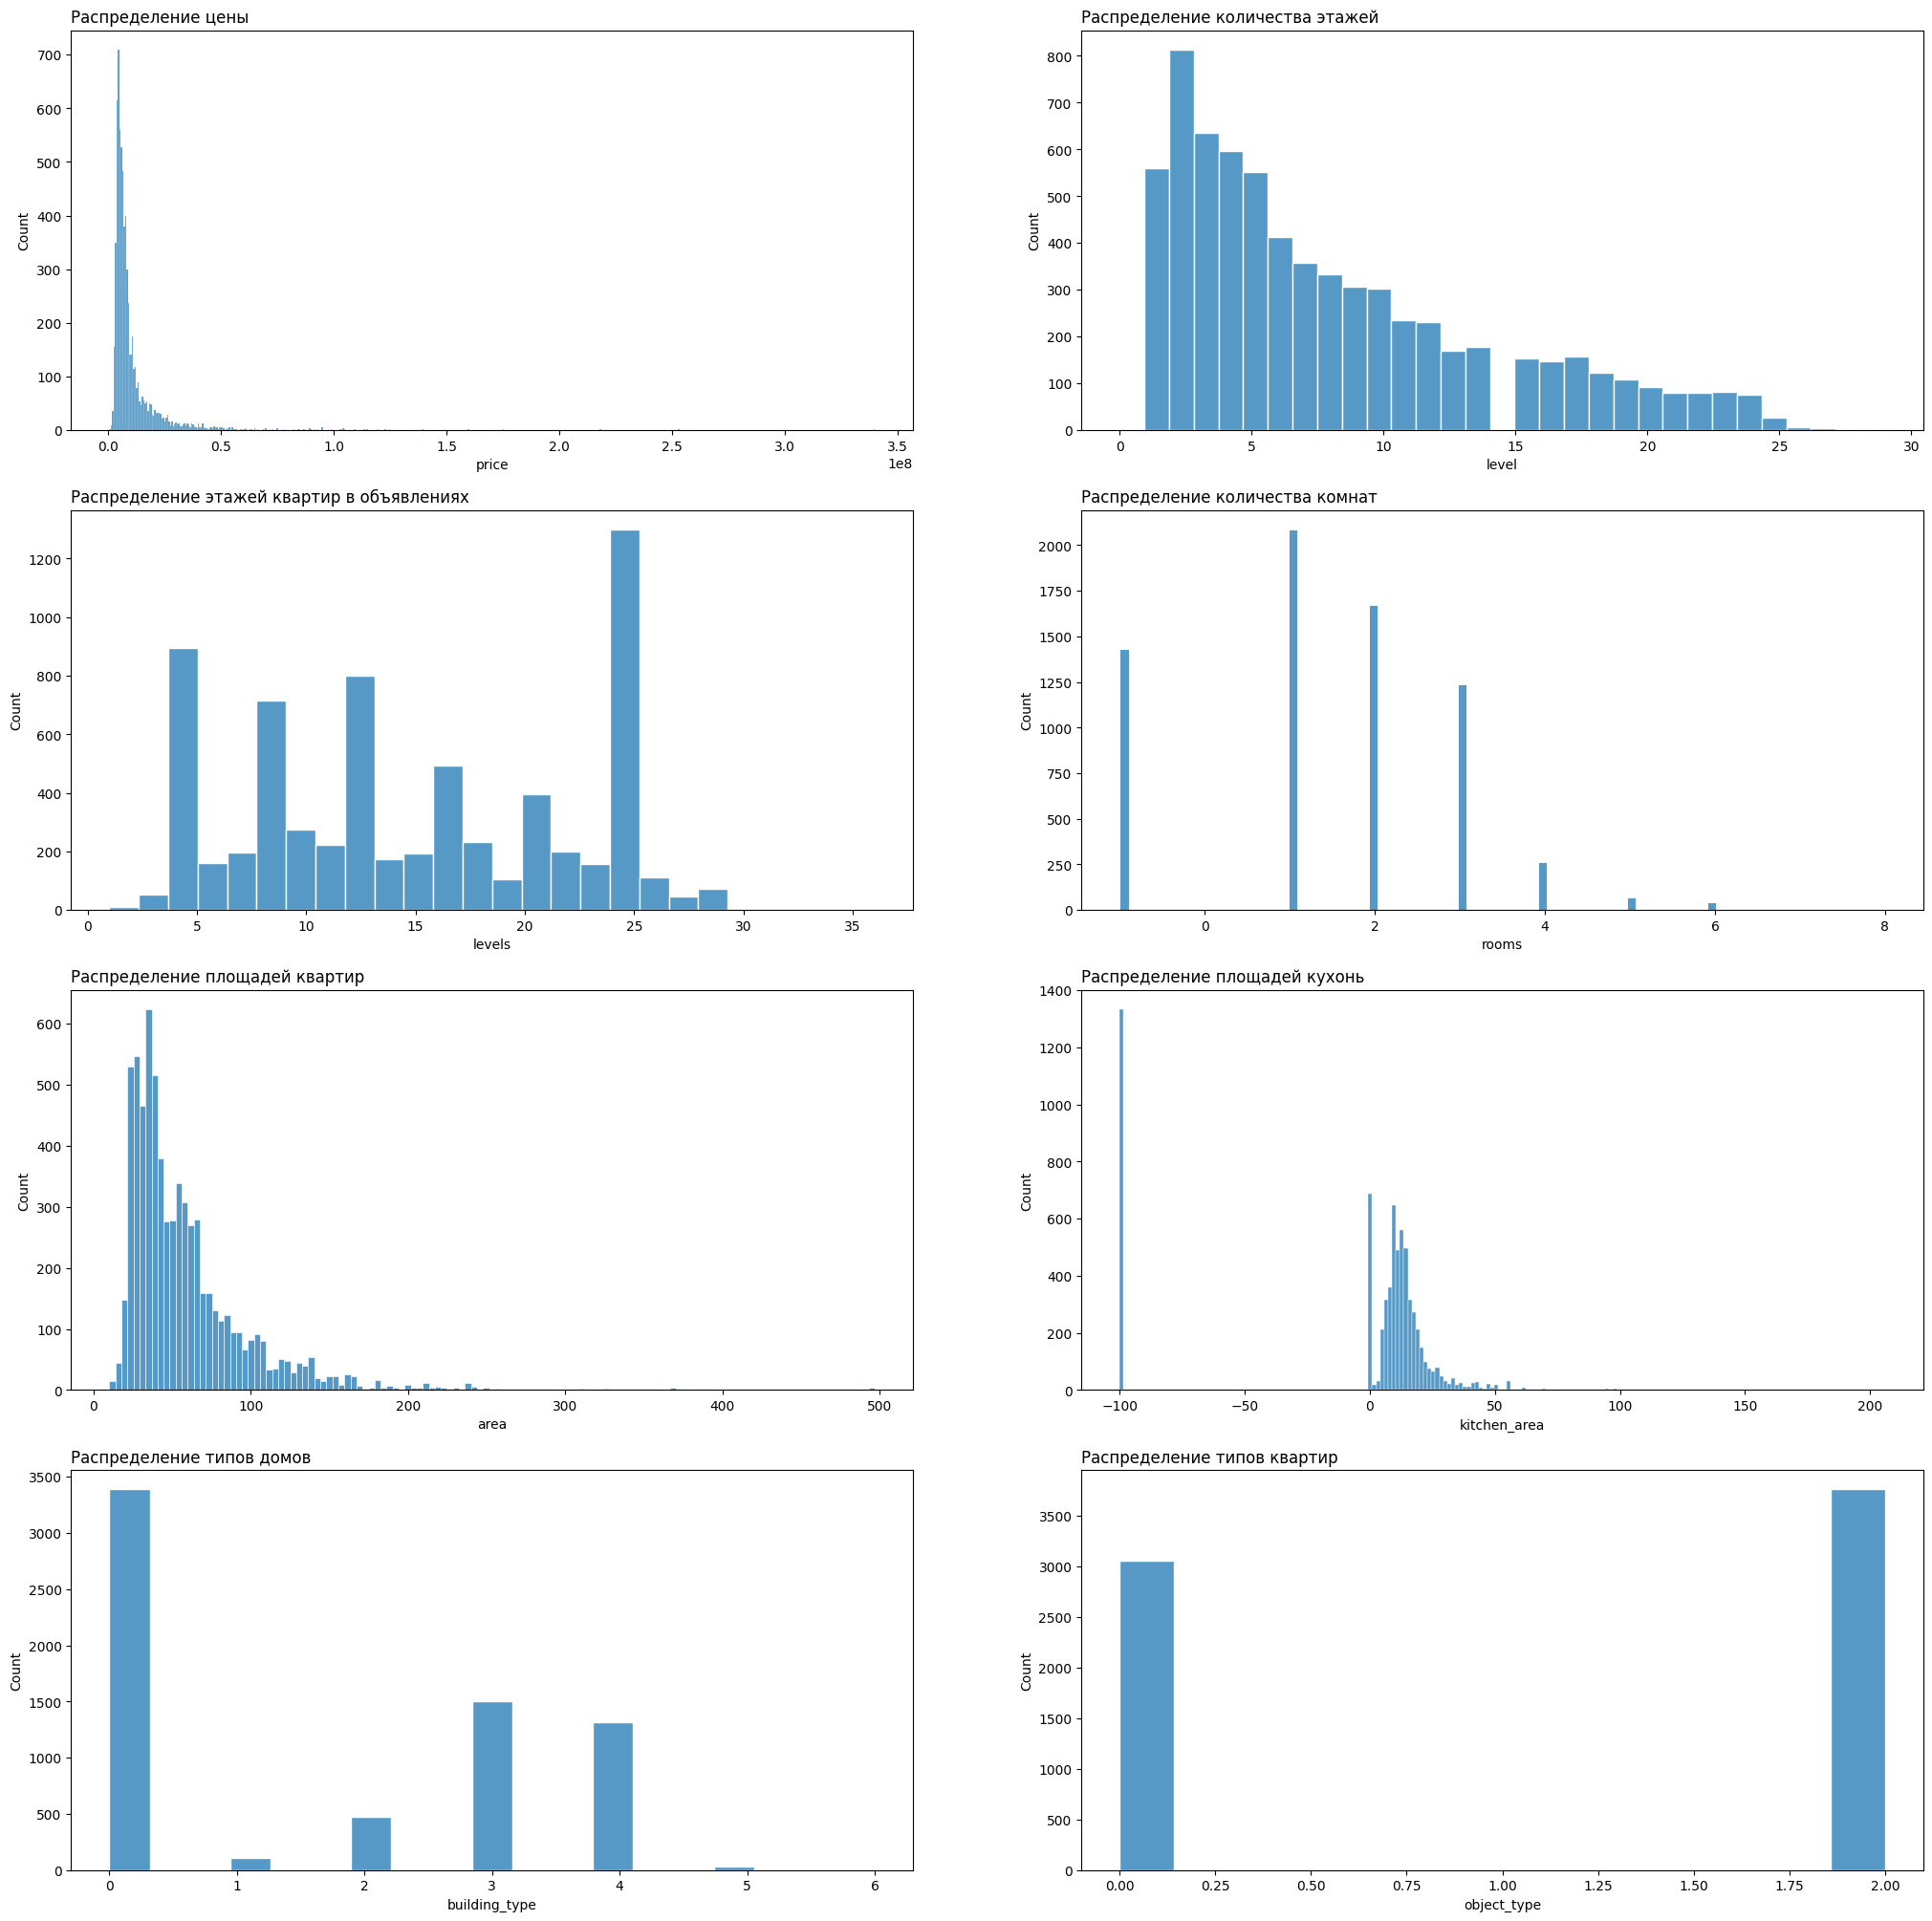

In [ ]:
fig, axes = plt.subplots(4, 2, figsize = (25, 25))
sns.set()

sns.histplot(data = saint_petersburg_df.price, ax = axes[0, 0])
axes[0, 0].set_title('Распределение цены', loc = 'left')

sns.histplot(data = saint_petersburg_df.area, ax = axes[2, 0])
axes[2, 0].set_title('Распределение площадей квартир', loc = 'left')

sns.histplot(data = saint_petersburg_df.building_type, ax = axes[3, 0])
axes[3, 0].set_title('Распределение типов домов', loc = 'left')

sns.histplot(data = saint_petersburg_df.object_type, ax = axes[3, 1])
axes[3, 1].set_title('Распределение типов квартир', loc = 'left')

sns.histplot(data = saint_petersburg_df.level, ax = axes[0, 1])
axes[0, 1].set_title('Распределение количества этажей', loc = 'left')

sns.histplot(data = saint_petersburg_df.levels, ax = axes[1, 0])
axes[1, 0].set_title('Распределение этажей квартир в объявлениях', loc = 'left')

sns.histplot(data = saint_petersburg_df.rooms, ax = axes[1, 1])
axes[1, 1].set_title('Распределение количества комнат', loc = 'left')

sns.histplot(data = saint_petersburg_df.kitchen_area, ax = axes[2, 1])
axes[2, 1].set_title('Распределение площадей кухонь', loc = 'left')

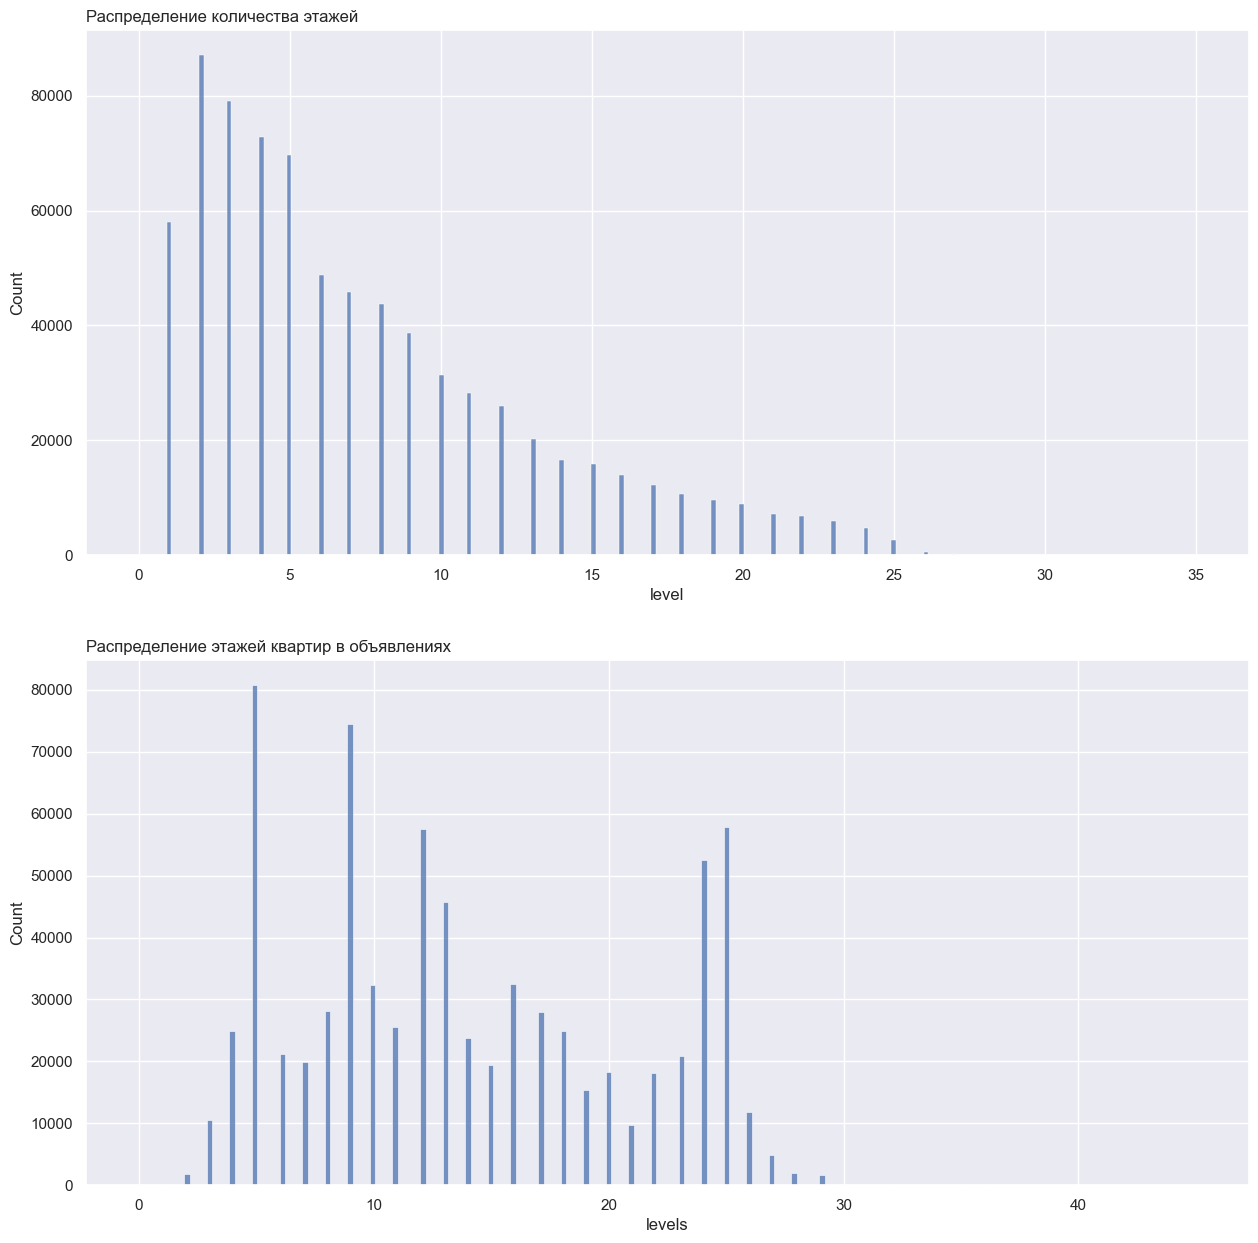

In [ ]:
fig, axes = plt.subplots(2, 1, figsize=(15, 15))
sns.set()

sns.histplot(data=saint_petersburg_df.level, ax=axes[0])
axes[0].set_title('Распределение количества этажей', loc='left')

sns.histplot(data=saint_petersburg_df.levels, ax=axes[1])
axes[1].set_title('Распределение этажей квартир в объявлениях', loc='left')

plt.show()

<Axes: xlabel='object_type', ylabel='price'>

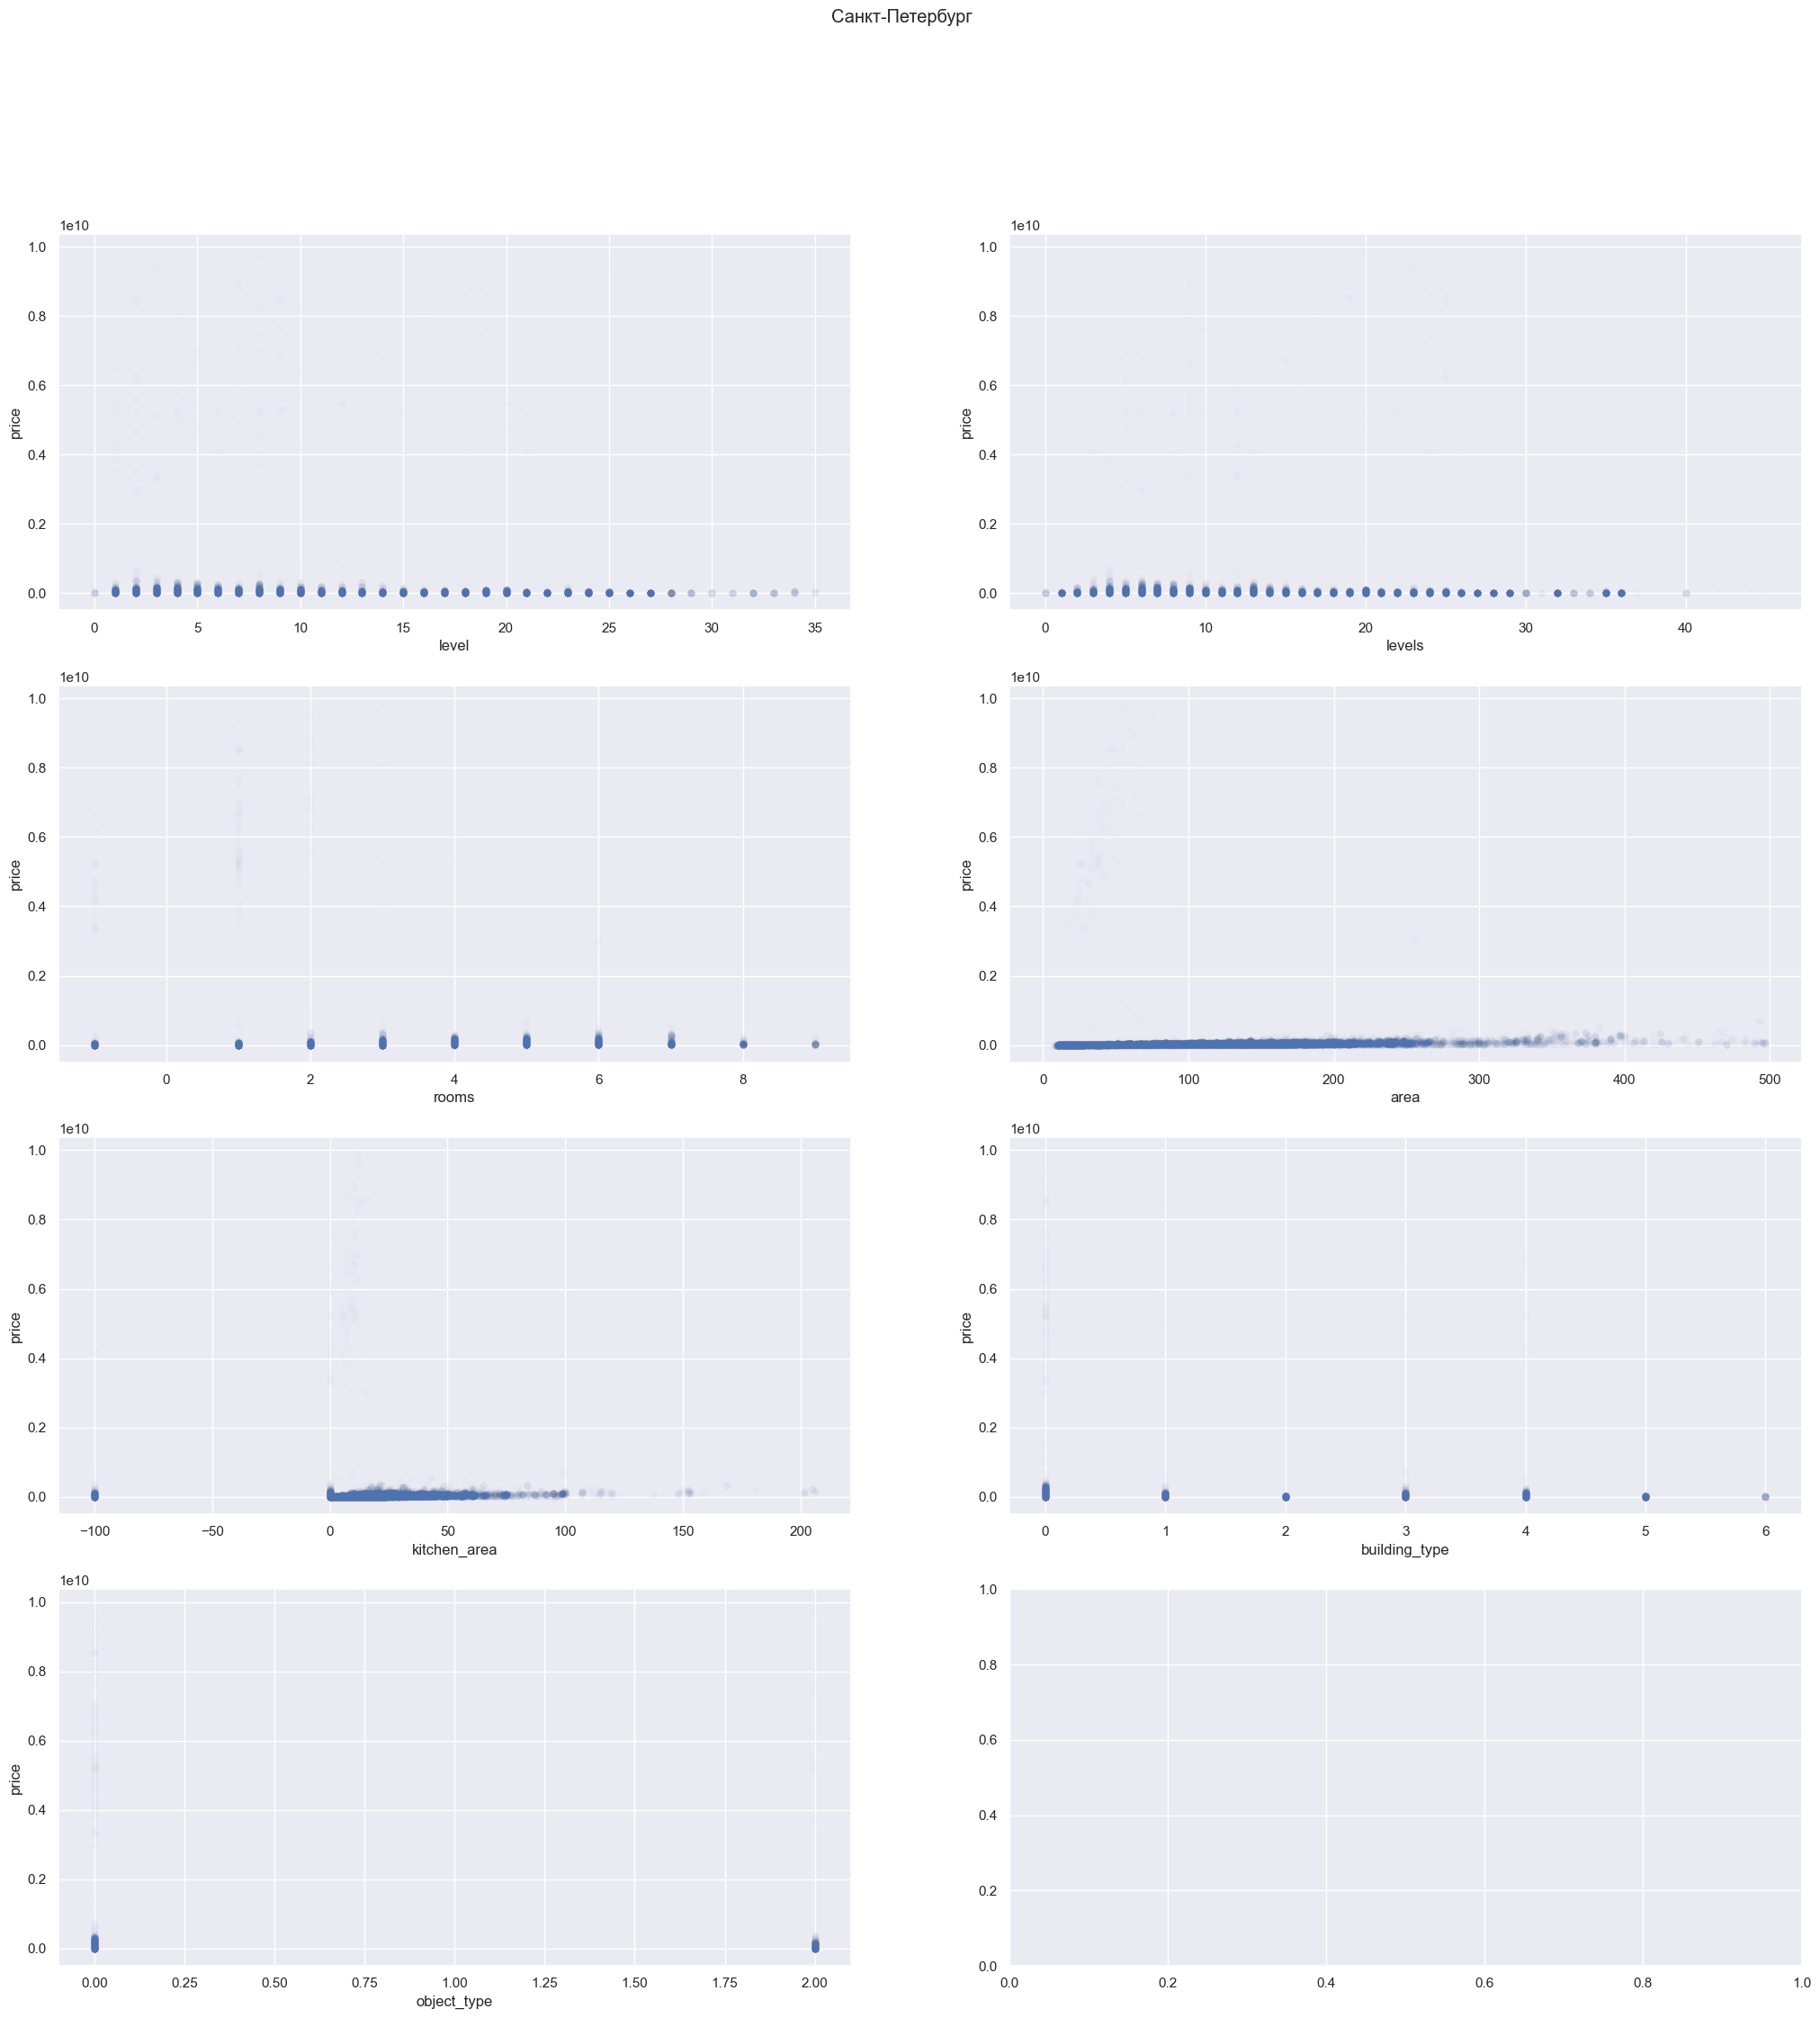

In [ ]:
# диаграммы рассеяния
fig, axes = plt.subplots(4, 2, figsize = (25, 25))
sns.set()
fig.suptitle('Санкт-Петербург')

sns.scatterplot(x='level', y='price', data=saint_petersburg_df, ax = axes[0, 0], alpha = 0.01)

sns.scatterplot(x='levels', y='price', data=saint_petersburg_df, ax = axes[0, 1], alpha = 0.01)

sns.scatterplot(x='rooms', y='price', data=saint_petersburg_df, ax = axes[1, 0], alpha = 0.01)

sns.scatterplot(x='area', y='price', data=saint_petersburg_df, ax = axes[1, 1], alpha = 0.01)

sns.scatterplot(x='kitchen_area', y='price', data=saint_petersburg_df, ax = axes[2, 0], alpha = 0.01)

sns.scatterplot(x='building_type', y='price', data=saint_petersburg_df, ax = axes[2, 1], alpha = 0.01)

sns.scatterplot(x='object_type', y='price', data=saint_petersburg_df, ax = axes[3, 0], alpha = 0.01)

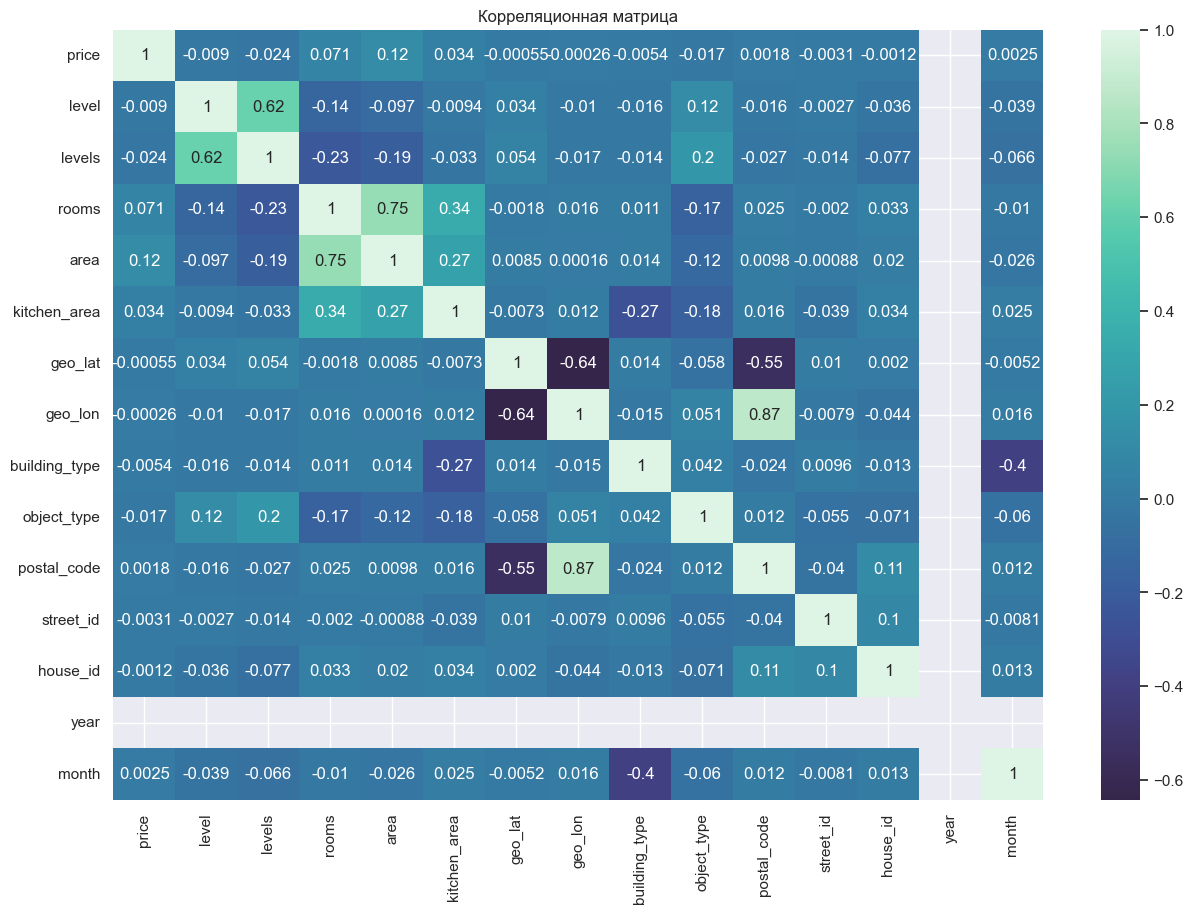

In [ ]:
# корреляционная матрица
plt.figure(figsize=(15, 10))
sns.heatmap(saint_petersburg_df.corr(), center=0, cmap='mako', annot=True)
plt.title('Корреляционная матрица')
plt.show()

In [ ]:
# производим очистку от выбросов

In [7]:
saint_petersburg_df.info(verbose = True, show_counts = True)

<class 'pandas.core.frame.DataFrame'>
Index: 2393 entries, 15 to 39583
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          2393 non-null   int64  
 1   level          2393 non-null   float64
 2   levels         2393 non-null   float64
 3   rooms          2393 non-null   float64
 4   area           2393 non-null   float64
 5   kitchen_area   2393 non-null   float64
 6   geo_lat        2393 non-null   float64
 7   geo_lon        2393 non-null   float64
 8   building_type  2393 non-null   float64
 9   object_type    2393 non-null   float64
 10  postal_code    2228 non-null   float64
 11  street_id      2117 non-null   float64
 12  house_id       2328 non-null   float64
 13  year           2393 non-null   int32  
 14  month          2393 non-null   int32  
dtypes: float64(12), int32(2), int64(1)
memory usage: 345.0 KB


In [8]:
saint_petersburg_df.isna().sum()

price              0
level              0
levels             0
rooms              0
area               0
kitchen_area       0
geo_lat            0
geo_lon            0
building_type      0
object_type        0
postal_code      165
street_id        276
house_id          65
year               0
month              0
dtype: int64

In [9]:
saint_petersburg_df.replace([np.inf, -np.inf], np.nan, inplace=True)
saint_petersburg_df.isna().sum()

price              0
level              0
levels             0
rooms              0
area               0
kitchen_area       0
geo_lat            0
geo_lon            0
building_type      0
object_type        0
postal_code      165
street_id        276
house_id          65
year               0
month              0
dtype: int64

In [10]:
# Удаляем ненужные колонки с пропусками
saint_petersburg_df.drop(columns = ['postal_code', 'street_id', 'house_id', 'year'], inplace = True)

In [11]:
saint_petersburg_df

,price,level,levels,rooms,area,kitchen_area,geo_lat,geo_lon,building_type,object_type,month
15,8865000,10.0,13.0,2.0,66.7,14.6,59.851179,30.411657,4.0,2.0,1
63,4200000,12.0,25.0,-1.0,25.8,-100.0,60.036889,30.226123,3.0,2.0,1
99,6574995,10.0,11.0,-1.0,31.0,-100.0,59.936744,30.251800,3.0,0.0,1
108,7068330,12.0,13.0,1.0,42.3,18.7,55.638429,37.652912,0.0,2.0,1
151,8865000,11.0,13.0,2.0,66.7,14.6,59.851179,30.411657,4.0,2.0,1
...,...,...,...,...,...,...,...,...,...,...,...
39436,5450000,5.0,12.0,-1.0,25.8,-100.0,59.926208,30.295114,3.0,2.0,1
39475,5850174,1.0,5.0,2.0,49.1,-100.0,59.798472,30.331733,4.0,2.0,1
39517,6299000,3.0,8.0,-1.0,31.0,0.0,59.984093,30.249716,0.0,0.0,1
39561,8500000,7.0,16.0,2.0,80.0,15.5,59.968545,30.428010,4.0,0.0,1


In [12]:
saint_petersburg_df.duplicated().sum()

99

In [13]:
saint_petersburg_df = saint_petersburg_df.drop_duplicates()
saint_petersburg_df.duplicated().sum()

0

In [ ]:
# меняем все отрицательные значения на противоположные

In [ ]:
print(saint_petersburg_df.rooms.unique())

In [23]:
saint_petersburg_df['rooms'] = saint_petersburg_df["rooms"].apply(lambda x: -x if x < 0 else x)

<ipython-input-23-4069fa1cf473>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  saint_petersburg_df['rooms'] = saint_petersburg_df["rooms"].apply(lambda x: -x if x < 0 else x)


In [ ]:
print(saint_petersburg_df.kitchen_area.unique())

In [24]:
saint_petersburg_df['kitchen_area'] = saint_petersburg_df["kitchen_area"].apply(lambda x: -x if x < 0 else x)

<ipython-input-24-2e2e128110af>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  saint_petersburg_df['kitchen_area'] = saint_petersburg_df["kitchen_area"].apply(lambda x: -x if x < 0 else x)


In [ ]:
# Если значения этажей в доме больше, чем этаж квартиры, то меняем их местами (так как это скорее просто ошибка парсинга)
saint_petersburg_df.loc[saint_petersburg_df["level"] > saint_petersburg_df["levels"], "level"] = saint_petersburg_df["levels"]

In [14]:
# Отрезаем по стандартному отклонению
def remove_outliers(df, columns):
    for column in columns:
        z_scores = (df[column] - df[column].mean()) / df[column].std()
        df = df[(z_scores.abs() < 1.5)]
    return df

numeric_columns = ['geo_lat', 'geo_lon', 'price', 'area', 'kitchen_area']
clean_data = remove_outliers(saint_petersburg_df, numeric_columns)

In [18]:
# тепловая карта после очистки
mapa = folium.Map(location=[saint_petersburg_df.geo_lat.mean(), saint_petersburg_df.geo_lon.mean()], zoom_start=6)
map_values = saint_petersburg_df[['geo_lat', 'geo_lon', 'price']]
data = map_values.values.tolist()
hm = HeatMap(data, min_opacity=0.05, max_opacity=0.9, radius=25).add_to(mapa)
mapa

# или
# 2 способ отображение тепловой карты
# из-за нехватки памяти обрывается
# import plotly_express as px
# fig = px.density_mapbox(saint_petersburg_df, lat='geo_lat', lon='geo_lon', z='price', radius=20, zoom=4, mapbox_style='open-street-map', height=600)
# fig.show()

Text(0.0, 1.0, 'Распределение площадей кухонь')

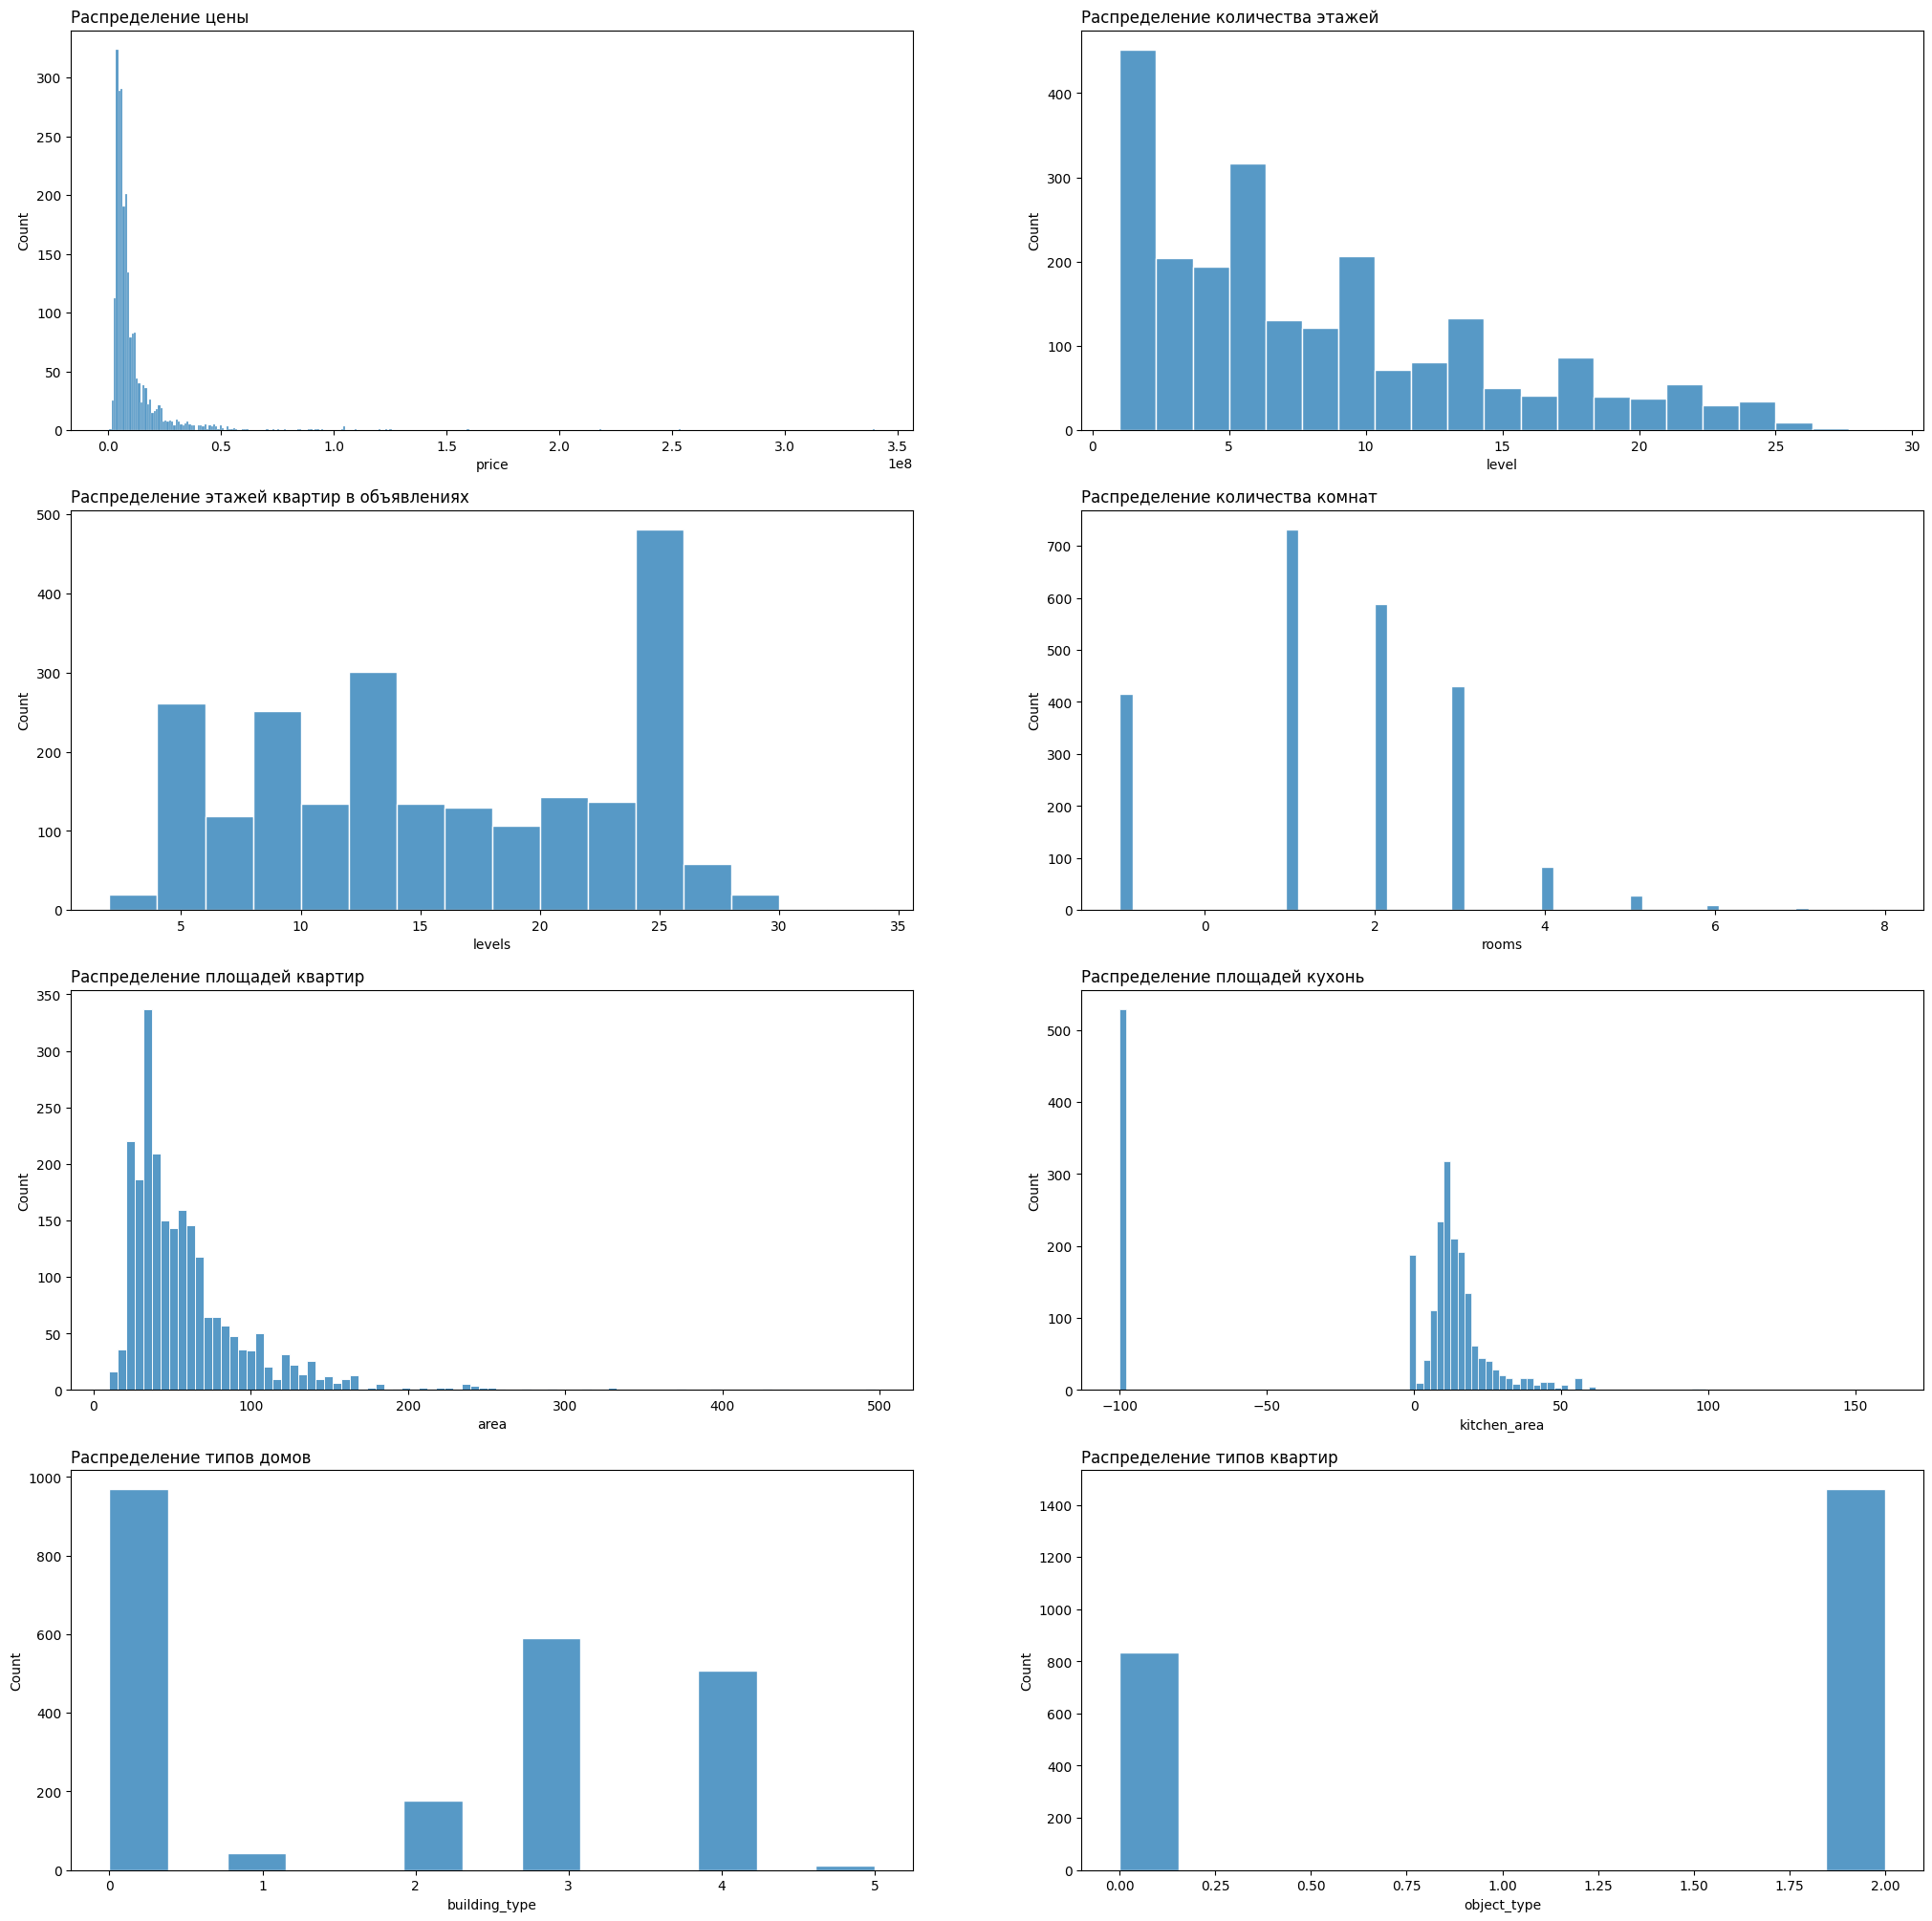

In [19]:
# гистограммы распределения после очистки
fig, axes = plt.subplots(4, 2, figsize = (25, 25))
sns.set()

sns.histplot(data = saint_petersburg_df.price, ax = axes[0, 0])
axes[0, 0].set_title('Распределение цены', loc = 'left')

sns.histplot(data = saint_petersburg_df.area, ax = axes[2, 0])
axes[2, 0].set_title('Распределение площадей квартир', loc = 'left')

sns.histplot(data = saint_petersburg_df.building_type, ax = axes[3, 0])
axes[3, 0].set_title('Распределение типов домов', loc = 'left')

sns.histplot(data = saint_petersburg_df.object_type, ax = axes[3, 1])
axes[3, 1].set_title('Распределение типов квартир', loc = 'left')

sns.histplot(data = saint_petersburg_df.level, ax = axes[0, 1])
axes[0, 1].set_title('Распределение количества этажей', loc = 'left')

sns.histplot(data = saint_petersburg_df.levels, ax = axes[1, 0])
axes[1, 0].set_title('Распределение этажей квартир в объявлениях', loc = 'left')

sns.histplot(data = saint_petersburg_df.rooms, ax = axes[1, 1])
axes[1, 1].set_title('Распределение количества комнат', loc = 'left')

sns.histplot(data = saint_petersburg_df.kitchen_area, ax = axes[2, 1])
axes[2, 1].set_title('Распределение площадей кухонь', loc = 'left')

<Axes: xlabel='object_type', ylabel='price'>

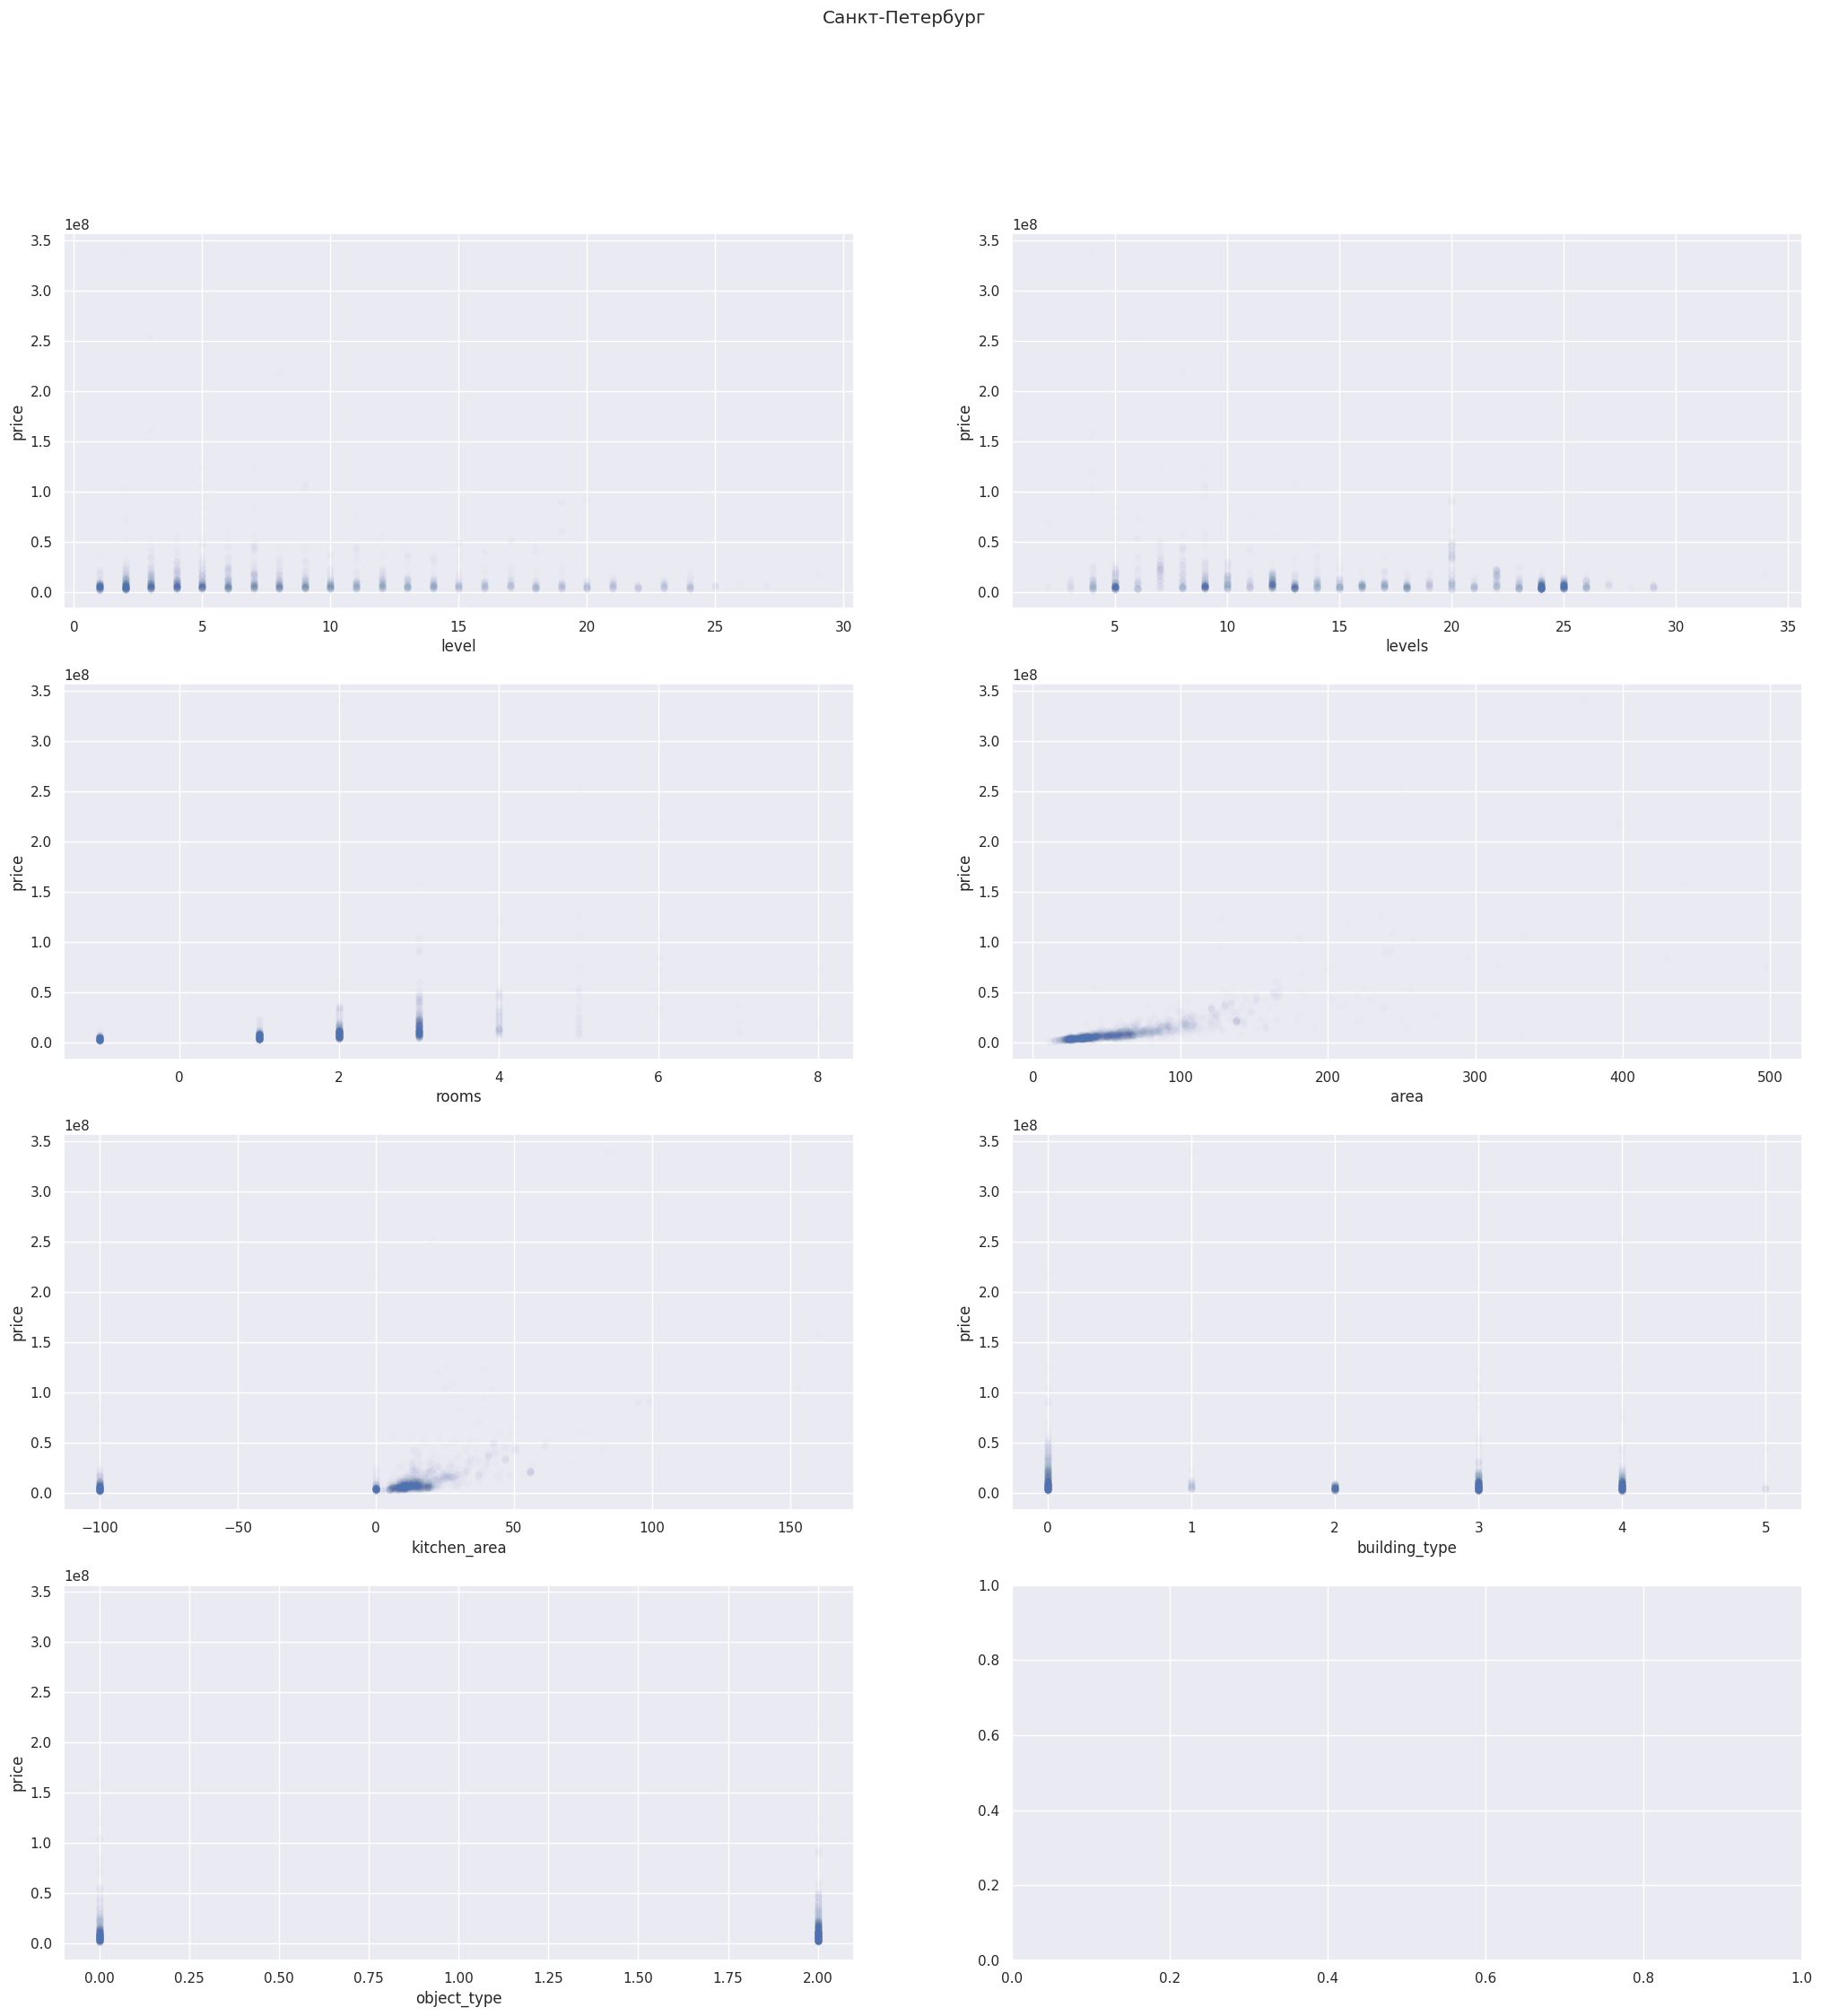

In [20]:
# диаграмма рассеяния после очистки
fig, axes = plt.subplots(4, 2, figsize = (25, 25))
sns.set()
fig.suptitle('Санкт-Петербург')

sns.scatterplot(x='level', y='price', data=saint_petersburg_df, ax = axes[0, 0], alpha = 0.01)

sns.scatterplot(x='levels', y='price', data=saint_petersburg_df, ax = axes[0, 1], alpha = 0.01)

sns.scatterplot(x='rooms', y='price', data=saint_petersburg_df, ax = axes[1, 0], alpha = 0.01)

sns.scatterplot(x='area', y='price', data=saint_petersburg_df, ax = axes[1, 1], alpha = 0.01)

sns.scatterplot(x='kitchen_area', y='price', data=saint_petersburg_df, ax = axes[2, 0], alpha = 0.01)

sns.scatterplot(x='building_type', y='price', data=saint_petersburg_df, ax = axes[2, 1], alpha = 0.01)

sns.scatterplot(x='object_type', y='price', data=saint_petersburg_df, ax = axes[3, 0], alpha = 0.01)

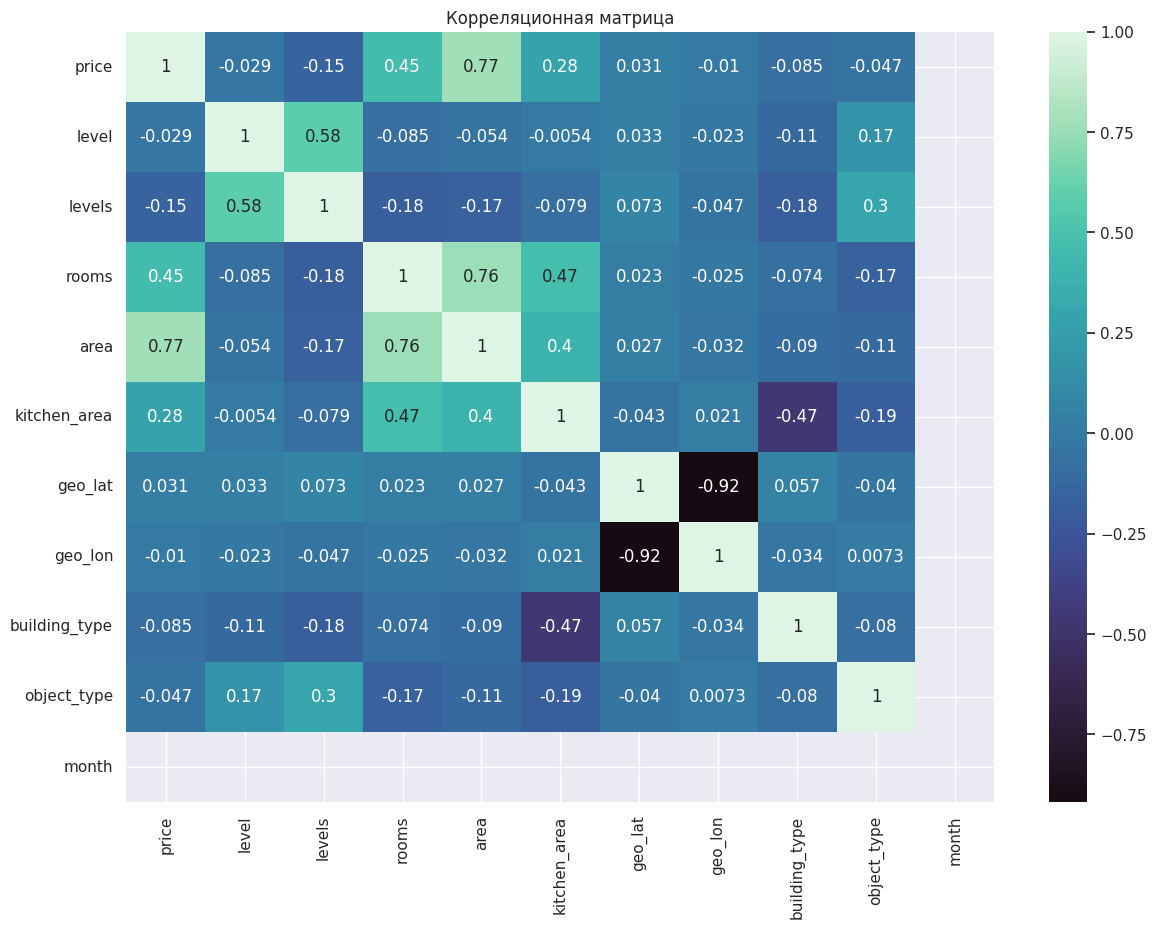

In [21]:
# корреляционная матрица после очистки
plt.figure(figsize=(14, 10))
sns.heatmap(saint_petersburg_df.corr(), center=0, cmap='mako', annot=True)
plt.title('Корреляционная матрица')
plt.show()

In [ ]:
#  деление в зависимости от площади и стоимости


In [53]:
# Масштабирование
from sklearn.preprocessing import StandardScaler

# X = saint_petersburg_df[['level', 'levels', 'rooms', 'area', 'kitchen_area', 'geo_lat', 'geo_lon', 'building_type', 'object_type']]
X = saint_petersburg_df[['level', 'levels', 'rooms', 'area', 'kitchen_area', 'geo_lat', 'geo_lon']]
Y = saint_petersburg_df['price']

# Создание объекта StandardScaler
scaler = StandardScaler()

# Масштабирование данных
X = scaler.fit_transform(X)

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [54]:
# делим на обучующую и тестовую выборки каждую из исходных выборок
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [55]:
# множественная линейная регрессия
model = LinearRegression()
model.fit(X_train, y_train)

print('Accuracy of Linear Regression on training data', model.score(X_train, y_train))
print('Accuracy of Linear Regression on testing data', model.score(X_test, y_test))

y_pred = model.predict(X_test)

Accuracy of Linear Regression on training data 0.649042251172697
Accuracy of Linear Regression on testing data 0.739686089235194


In [45]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
# коэффициент R^2
r2_score(y_test, y_pred)

0.7413070402078534

In [57]:
# средняя квадратичная ошибка
from sklearn.metrics import mean_squared_error

# mean_squared_error(y_test, y_pred)
mean_squared_error(y_test, y_pred)

19705276030937.055

In [60]:
mean_absolute_error(y_test, y_pred)

2766111.9523386694

In [59]:
saint_petersburg_df['price'].mean()

10800621.58238884